In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]


In [13]:
data_folder = r"E:\data\gst-0815-23\Pre-Test\Parallel_Search"
agent_num_list = [10, 30, 50, 70, 90]
g_fitness_across_K_size, s_fitness_across_K_size = [], []
for agent_num in agent_num_list:
    g_performance_file = data_folder + r"\g_performance_across_K_size_{0}".format(agent_num)
    s_performance_file = data_folder + r"\s_performance_across_K_size_{0}".format(agent_num)
    
    g_cog_performance_file = data_folder + r"\g_cog_performance_across_K_time_size_{0}".format(agent_num)
    s_cog_performance_file = data_folder + r"\s_cog_performance_across_K_time_size_{0}".format(agent_num)
    
    g_variance_file = data_folder + r"\g_variance_across_K_size_{0}".format(agent_num)
    s_variance_file = data_folder + r"\s_variance_across_K_size_{0}".format(agent_num)
    
    g_performance_time_file = data_folder + r"\g_performance_across_K_time_size_{0}".format(agent_num)
    s_performance_time_file = data_folder + r"\s_performance_across_K_time_size_{0}".format(agent_num)
    
    with open(g_performance_file, 'rb') as infile:
        g_fitness = pickle.load(infile)
    with open(s_performance_file, 'rb') as infile:
        s_fitness = pickle.load(infile)
    
    with open(g_cog_performance_file, 'rb') as infile:
        g_cog_fitness = pickle.load(infile)
    with open(s_cog_performance_file, 'rb') as infile:
        s_cog_fitness = pickle.load(infile)
    
    with open(g_variance_file, 'rb') as infile:
        g_variance = pickle.load(infile)
    with open(s_variance_file, 'rb') as infile:
        s_variance = pickle.load(infile)
    
    with open(g_performance_time_file, 'rb') as infile:
        g_performance_time = pickle.load(infile)
    with open(s_performance_time_file, 'rb') as infile:
        s_performance_time = pickle.load(infile)
        
    g_fitness_across_K_size.append(g_fitness)
    s_fitness_across_K_size.append(s_fitness)

print(np.array(g_fitness_across_K_size, dtype=object).shape)
print(np.array(g_fitness_across_K_size, dtype=object).shape)
print(g_fitness_across_K_size[0])

(5,)
(5,)
[0.7056942691247311, 0.677868835990464, 0.6707872721255682, 0.6627884485076408, 0.6603123173868937, 0.6549579159032309, 0.6483914979432649, 0.6429977685778926, 0.6381925116551816]


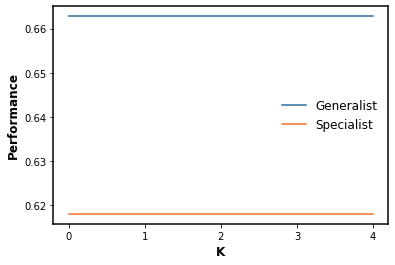

In [14]:
# GS Fitness Given the Same K and Varying Agent Numbers
given_K_index = 3
g_fitness_across_size, s_fitness_across_size = [], []
for g_fitness, s_fitness in zip(g_fitness_across_K_size, s_fitness_across_K_size):
    g_fitness_across_size.append(g_fitness[given_K_index])
    s_fitness_across_size.append(s_fitness[given_K_index])

x = range(len(s_fitness_across_size))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, g_fitness_across_size, "-", label="Generalist", color=nature_blue)
plt.plot(x, s_fitness_across_size, "-", label="Specialist", color=nature_orange)

plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\GS_performance.png", transparent=True, dpi=300)
plt.show()

<ipython-input-15-03ddb7629000>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, g_variance, "k-", label="G", color=nature_blue)
<ipython-input-15-03ddb7629000>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, s_variance, "k-", label="S", color=nature_green)


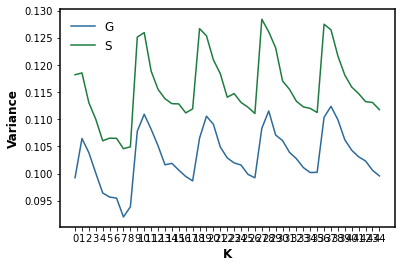

In [15]:
# GST Variance
x = range(len(g_variance))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, g_variance, "k-", label="G", color=nature_blue)
plt.plot(x, s_variance, "k-", label="S", color=nature_green)
# plt.plot(x, t_variance, "k-", label="T", color=nature_orange)

plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Variance', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\GST_variance.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

<ipython-input-16-02ca23e76d00>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, g_performance_time[0], "k-", label="K=0", color=morandi_green)
<ipython-input-16-02ca23e76d00>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, g_performance_time[1], "k-", label="K=1", color=morandi_orange)
<ipython-input-16-02ca23e76d00>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, g_performance_time[2], "k-", label="K=2", color=morandi_red)
<ipython-input-16-02ca23e76d00>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.


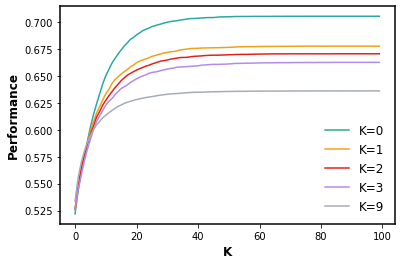

In [16]:
# Assess the time dimension
x = range(len(g_performance_time[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, g_performance_time[0], "k-", label="K=0", color=morandi_green)
plt.plot(x, g_performance_time[1], "k-", label="K=1", color=morandi_orange)
plt.plot(x, g_performance_time[2], "k-", label="K=2", color=morandi_red)
plt.plot(x, g_performance_time[3], "k-", label="K=3", color=morandi_purple)
plt.plot(x, g_performance_time[-1], "k-", label="K=9", color=deep_grey)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\G_performance.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

<ipython-input-17-03faba9d1775>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, s_performance_time[0], "k-", label="K=0", color=morandi_green)
<ipython-input-17-03faba9d1775>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, s_performance_time[1], "k-", label="K=1", color=morandi_orange)
<ipython-input-17-03faba9d1775>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, s_performance_time[2], "k-", label="K=2", color=morandi_red)
<ipython-input-17-03faba9d1775>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.


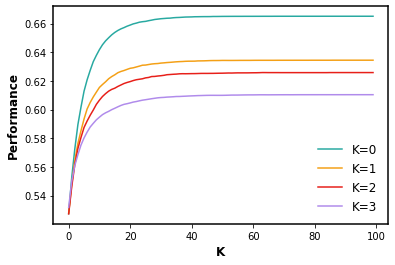

In [17]:
# Assess the time dimension
x = range(len(s_performance_time[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, s_performance_time[0], "k-", label="K=0", color=morandi_green)
plt.plot(x, s_performance_time[1], "k-", label="K=1", color=morandi_orange)
plt.plot(x, s_performance_time[2], "k-", label="K=2", color=morandi_red)
plt.plot(x, s_performance_time[-1], "k-", label="K=3", color=morandi_purple)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\S_performance.png", transparent=True, dpi=300)
plt.show()
# plt.clf()